<a href="https://colab.research.google.com/github/leman-cap13/DL_projects/blob/main/Walmart_Sales_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"lmanqasml","key":"2d851a4eb9cae06770577185722326e0"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d aslanahmedov/walmart-sales-forecast

Dataset URL: https://www.kaggle.com/datasets/aslanahmedov/walmart-sales-forecast
License(s): copyright-authors
walmart-sales-forecast.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/walmart-sales-forecast.zip', 'r')
zip_ref.extractall()


In [ ]:
import pandas as pd
df = pd.read_csv('/content/train.csv')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
df_test = pd.read_csv('/content/test.csv')
df_test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [ ]:
feature_data=pd.read_csv('/content/features.csv')
feature_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
df.isna().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0


In [ ]:
df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
data=pd.read_csv('/content/train.csv', parse_dates=['Date'],index_col=['Date'])

data.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


In [ ]:
data = data.reset_index()

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.isocalendar().week


data['Lag_1'] = data.groupby('Store')['Weekly_Sales'].shift(1)
data['Lag_2'] = data.groupby('Store')['Weekly_Sales'].shift(2)


data['Rolling_4'] = data.groupby('Store')['Weekly_Sales'].shift(1).rolling(4).mean()

data.head(10)


,Date,Store,Dept,Weekly_Sales,IsHoliday,Year,Month,Week,Lag_1,Lag_2,Rolling_4
0,2010-02-05,1,1,24924.50,False,2010,2,5,NaN,NaN,NaN
1,2010-02-12,1,1,46039.49,True,2010,2,6,24924.50,NaN,NaN
2,2010-02-19,1,1,41595.55,False,2010,2,7,46039.49,24924.50,NaN
3,2010-02-26,1,1,19403.54,False,2010,2,8,41595.55,46039.49,NaN
4,2010-03-05,1,1,21827.90,False,2010,3,9,19403.54,41595.55,32990.7700
5,2010-03-12,1,1,21043.39,False,2010,3,10,21827.90,19403.54,32216.6200
6,2010-03-19,1,1,22136.64,False,2010,3,11,21043.39,21827.90,25967.5950
7,2010-03-26,1,1,26229.21,False,2010,3,12,22136.64,21043.39,21102.8675
8,2010-04-02,1,1,57258.43,False,2010,4,13,26229.21,22136.64,22809.2850
9,2010-04-09,1,1,42960.91,False,2010,4,14,57258.43,26229.21,31666.9175


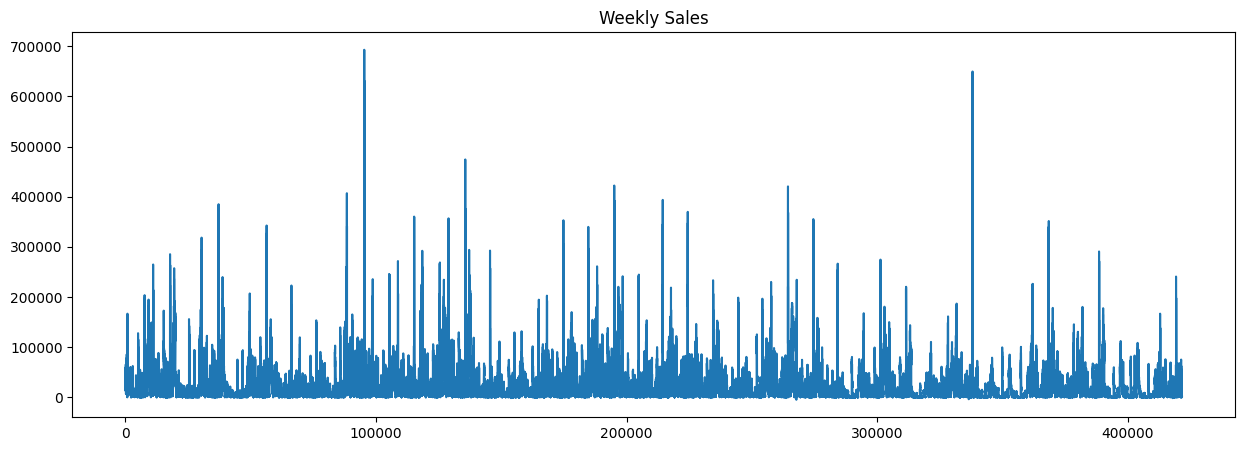

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data['Weekly_Sales'].plot(figsize=(15,5),title='Weekly Sales')
plt.show()

In [ ]:
data = data.dropna()

train = data[data['Year'] < 2012]
test = data[data['Year'] == 2012]

X_train = train[['Store', 'Dept', 'Year', 'Month', 'Week', 'Lag_1', 'Lag_2', 'Rolling_4']]
y_train = train['Weekly_Sales']

X_test = test[['Store', 'Dept', 'Year', 'Month', 'Week', 'Lag_1', 'Lag_2', 'Rolling_4']]
y_test = test['Weekly_Sales']


# lightgbm model

In [ ]:
!pip install lightgbm

import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import numpy as np


model = lgb.LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    random_state=42
)


model.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 962
[LightGBM] [Info] Number of data points in the train set: 293952, number of used features: 8
[LightGBM] [Info] Start training from score 16101.089506


LGBMRegressor(learning_rate=0.05, n_estimators=500, random_state=42)

In [ ]:
y_pred = model.predict(X_test)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 3236.9985635832923


In [ ]:
model.score(X_test,y_test)

0.9785860469567199

In [ ]:
model.score(X_train,y_train)

0.9771154932784968

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt



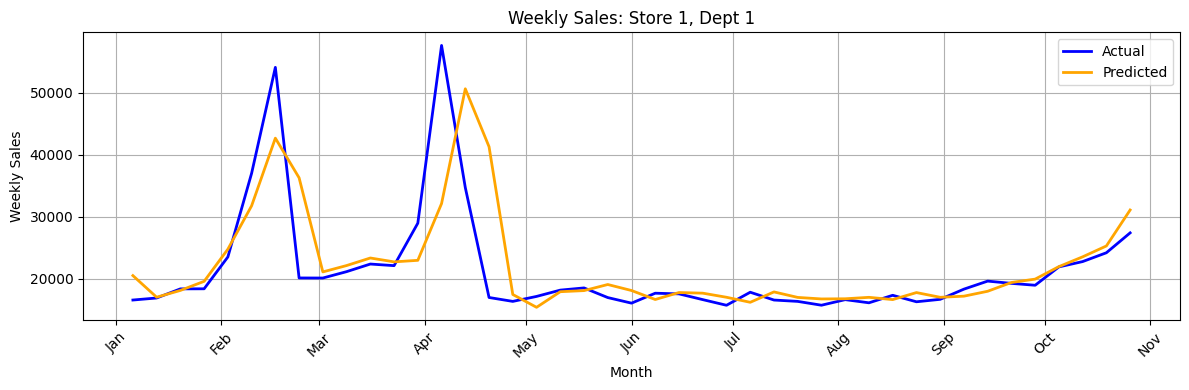

In [ ]:
store_id = 1
dept_id = 1

mask = (test['Store'] == store_id) & (test['Dept'] == dept_id)
dates = test.loc[mask, 'Date']
y_test_sel = y_test[mask]
y_pred_sel = y_pred[mask]

plt.figure(figsize=(12,4))
plt.plot(dates, y_test_sel, label='Actual', color='blue', linewidth=2)
plt.plot(dates, y_pred_sel, label='Predicted', color='orange', linewidth=2)


plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xticks(rotation=45)

plt.title(f'Weekly Sales: Store {store_id}, Dept {dept_id}')
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


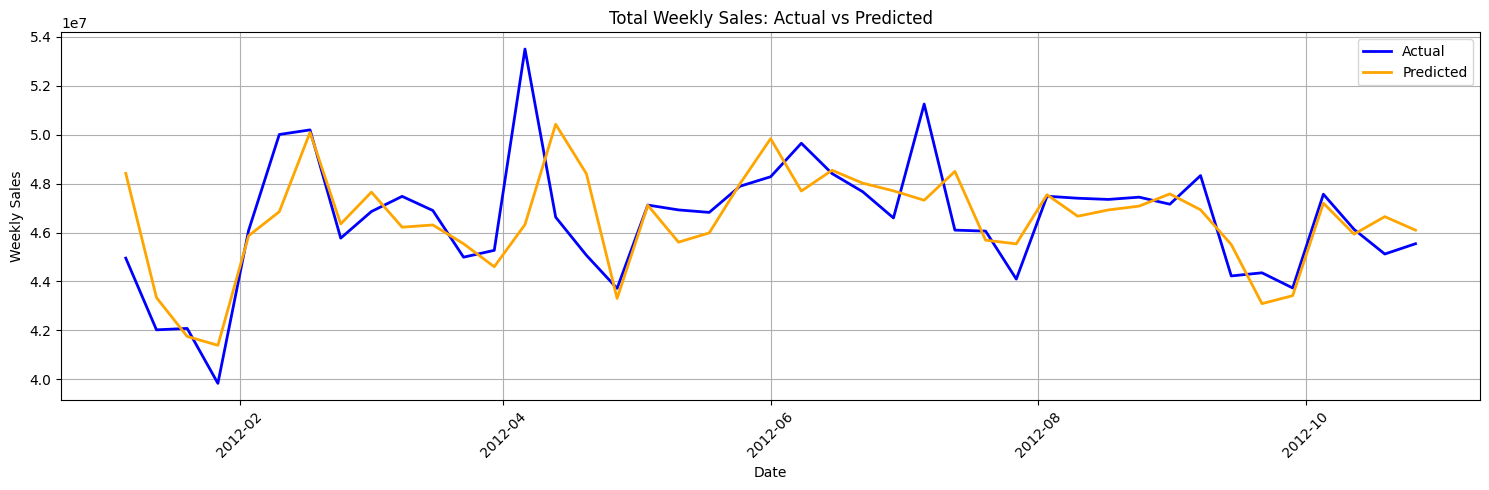

In [ ]:
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt


test_plot = test.copy()
test_plot['Predicted'] = y_pred


total_plot = test_plot.groupby('Date')[['Weekly_Sales','Predicted']].sum()

plt.figure(figsize=(15,5))
plt.plot(total_plot.index, total_plot['Weekly_Sales'], label='Actual', color='blue', linewidth=2)
plt.plot(total_plot.index, total_plot['Predicted'], label='Predicted', color='orange', linewidth=2)


plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.title('Total Weekly Sales: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


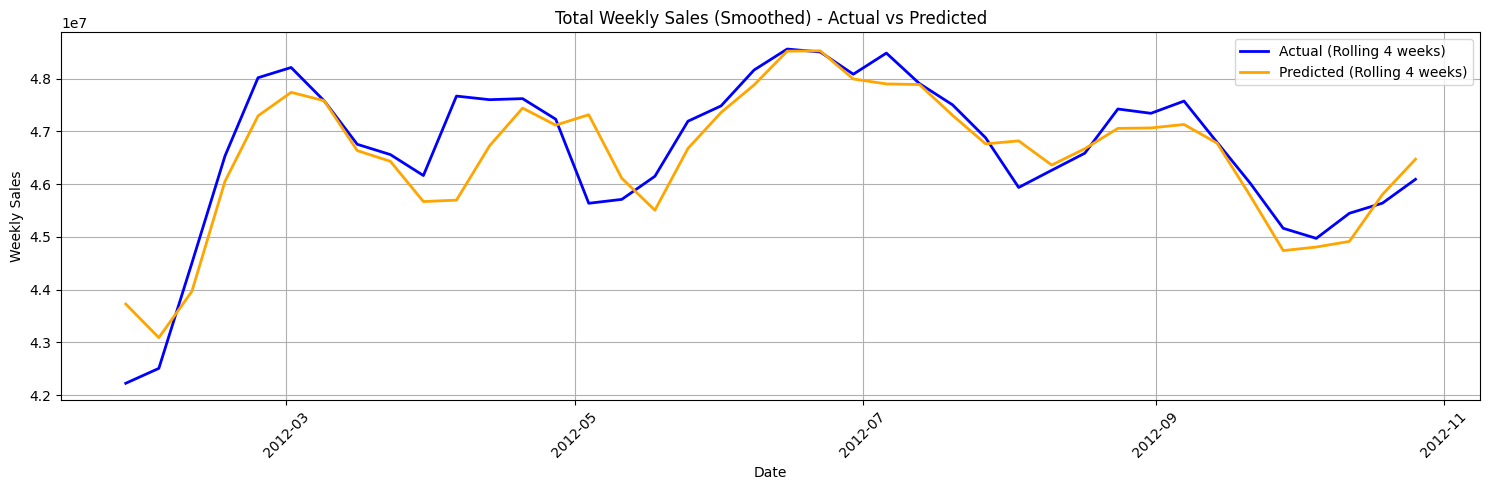

In [ ]:
total_plot['Weekly_Sales_Roll'] = total_plot['Weekly_Sales'].rolling(4).mean()
total_plot['Predicted_Roll'] = total_plot['Predicted'].rolling(4).mean()

plt.figure(figsize=(15,5))
plt.plot(total_plot.index, total_plot['Weekly_Sales_Roll'], label='Actual (Rolling 4 weeks)', color='blue', linewidth=2)
plt.plot(total_plot.index, total_plot['Predicted_Roll'], label='Predicted (Rolling 4 weeks)', color='orange', linewidth=2)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.title('Total Weekly Sales (Smoothed) - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


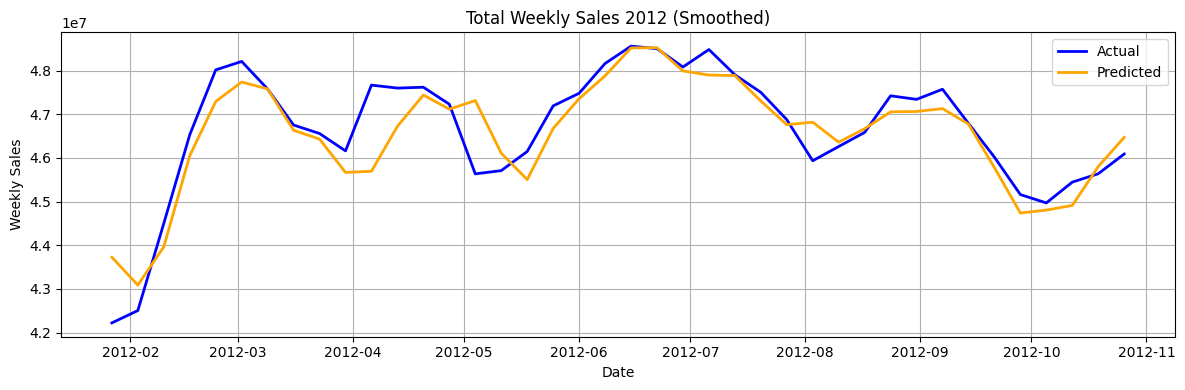

In [ ]:
zoom_plot = total_plot['2012-01-01':'2012-12-31']
plt.figure(figsize=(12,4))
plt.plot(zoom_plot.index, zoom_plot['Weekly_Sales_Roll'], label='Actual', color='blue', linewidth=2)
plt.plot(zoom_plot.index, zoom_plot['Predicted_Roll'], label='Predicted', color='orange', linewidth=2)
plt.title('Total Weekly Sales 2012 (Smoothed)')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#LSTM MODEL

In [ ]:
import numpy as np


store_id = 1
dept_id = 1
data_lstm = data[(data['Store']==store_id) & (data['Dept']==dept_id)].sort_values('Date')


features = ['Lag_1','Lag_2','Rolling_4']
target = 'Weekly_Sales'

X = data_lstm[features].values
y = data_lstm[target].values


from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1,1))

X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))


In [ ]:
train_size = int(0.8*len(X_scaled))
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,851 (42.39 KB)

 Trainable params: 10,851 (42.39 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1,
    shuffle=False
)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0783 - val_loss: 0.0079
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0515 - val_loss: 0.0230
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0530 - val_loss: 0.0108
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0448 - val_loss: 0.0076
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0404 - val_loss: 0.0106
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0384 - val_loss: 0.0076
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0359 - val_loss: 0.0078
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0349 - val_loss: 0.0076
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0334 - val_loss: 0.0075
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0317 - val_loss: 0.0073
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0295 - val_loss: 0.0057
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0268 - val_loss: 0.0048
E

In [ ]:
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_real = scaler_y.inverse_transform(y_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


In [ ]:
y_pred

array([[18200.953],
       [14593.169],
       [15461.261],
       [17259.232],
       [19724.746],
       [20117.387],
       [16616.432],
       [15213.772],
       [18979.28 ],
       [18253.664],
       [16306.147],
       [14672.954],
       [19494.54 ],
       [16120.611],
       [16075.798],
       [14830.98 ],
       [17008.861],
       [15635.548],
       [18366.557],
       [15696.323],
       [16883.49 ],
       [20225.676],
       [22459.572],
       [21181.97 ],
       [20572.477],
       [27207.264],
       [28286.25 ],
       [31327.695]], dtype=float32)

In [ ]:
y_test_real

array([[16976.19],
       [16347.6 ],
       [17147.44],
       [18164.2 ],
       [18517.79],
       [16963.55],
       [16065.49],
       [17666.  ],
       [17558.82],
       [16633.41],
       [15722.82],
       [17823.37],
       [16566.18],
       [16348.06],
       [15731.18],
       [16628.31],
       [16119.92],
       [17330.7 ],
       [16286.4 ],
       [16680.24],
       [18322.37],
       [19616.22],
       [19251.5 ],
       [18947.81],
       [21904.47],
       [22764.01],
       [24185.27],
       [27390.81]])

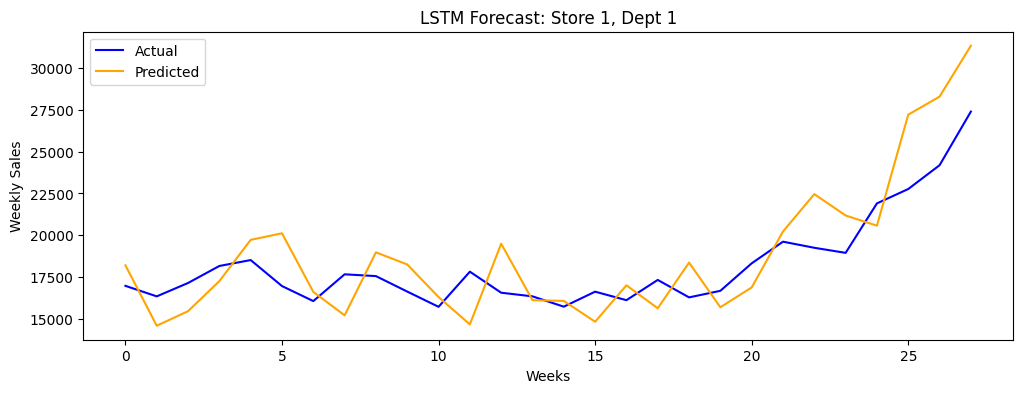

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(y_test_real, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='orange')
plt.title(f'LSTM Forecast: Store {store_id}, Dept {dept_id}')
plt.xlabel('Weeks')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()


#SARIMA Model

In [ ]:
!pip install statsmodels

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Məsələn Store 1, Dept 1
store_id = 1
dept_id = 1
data_sd = data[(data['Store']==store_id) & (data['Dept']==dept_id)].sort_values('Date')
ts = data_sd.set_index('Date')['Weekly_Sales']

# Train/Test split
train_size = int(0.8*len(ts))
train_ts = ts[:train_size]
test_ts = ts[train_size:]

# SARIMA model qur
model = SARIMAX(train_ts, order=(1,1,1), seasonal_order=(1,1,1,52))
model_fit = model.fit(disp=False)



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few obser

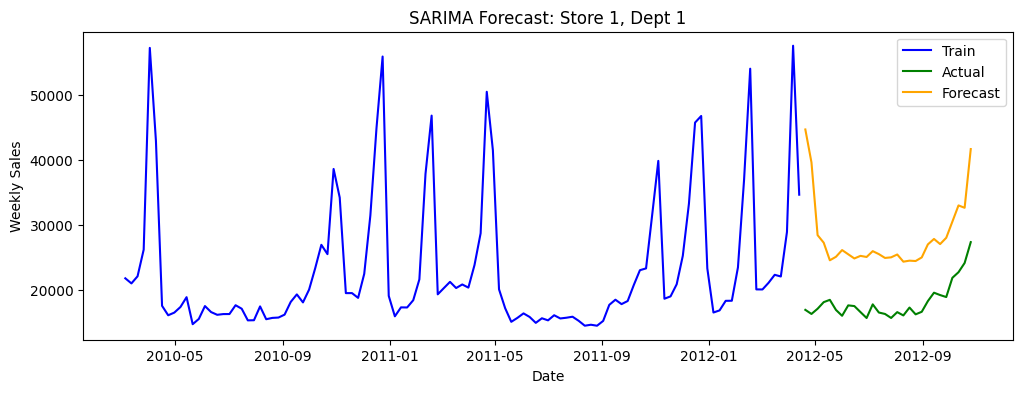

In [ ]:
forecast = model_fit.predict(start=test_ts.index[0], end=test_ts.index[-1])

# Plot
plt.figure(figsize=(12,4))
plt.plot(train_ts.index, train_ts, label='Train', color='blue')
plt.plot(test_ts.index, test_ts, label='Actual', color='green')
plt.plot(forecast.index, forecast, label='Forecast', color='orange')
plt.title(f'SARIMA Forecast: Store {store_id}, Dept {dept_id}')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()